In [1]:
!pip install tld

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [3]:
benign = pd.read_csv('Benign_list_big_final.csv', names=['url'])
benign['label'] = 0
benign.head()

,url,label
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0


In [4]:
defacement = pd.read_csv('DefacementSitesURLFiltered.csv', names=['url'])
defacement['label'] = 1
defacement.head()

,url,label
0,http://www.sinduscongoias.com.br/index.html,1
1,http://www.sinduscongoias.com.br/index.php/ins...,1
2,http://www.sinduscongoias.com.br/index.php/ins...,1
3,http://www.sinduscongoias.com.br/index.php/ins...,1
4,http://www.sinduscongoias.com.br/index.php/ins...,1


In [5]:
malware = pd.read_csv('Malware_dataset.csv', names=['url'])
malware['label'] = 2
malware.head()

,url,label
0,http://gzzax.livechatvalue.com/chat/chatClient...,2
1,http://gzzax.livechatvalue.com/chat/chatClient...,2
2,http://gzzax.livechatvalue.com/chat/chatClient...,2
3,http://gzzax.livechatvalue.com/chat/chatClient...,2
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,2


In [6]:
spam = pd.read_csv('spam_dataset.csv', names=['url'])
spam['label'] = 3
spam.head()

,url,label
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,3
1,http://archive.salisburyjournal.co.uk/2007/3/6...,3
2,http://appbasic.jettons.co.uk/links/index.html,3
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,3
4,http://acard4u.co.uk/product_reviews.php?cPath...,3


In [7]:
phishing = pd.read_csv('phishing_dataset.csv', names=['url'])
phishing['label'] = 4
phishing.head()

,url,label
0,http://v2.email-marketing.adminsimple.com/trac...,4
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,4
2,http://webmail2.centurytel.net/hwebmail/servic...,4
3,http://www.google.com.ng/imgres?imgurl=http://...,4
4,http://webmail2.centurytel.net/hwebmail/servic...,4


In [8]:
data=pd.concat([benign, defacement, malware,spam, phishing])
data.head()

,url,label
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0


In [9]:
data.info() #information of data

<class 'pandas.core.frame.DataFrame'>
Index: 165366 entries, 0 to 9964
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     165366 non-null  object
 1   label   165366 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ MB


In [10]:
data.isnull().sum() #finding any null values

url      0
label    0
dtype: int64

# Data preprocessing

In [11]:
#Length of URL
data['urlSize'] = data['url'].apply(lambda i: len(str(i)))
data.head()

,url,label,urlSize
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83


In [12]:
#Hostname Length
data['hostNameSize'] = data['url'].apply(lambda i: len(urlparse(i).netloc))
data.head()

,url,label,urlSize,hostNameSize
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8


In [13]:
#Path Length
data['pathSize'] = data['url'].apply(lambda i: len(urlparse(i).path))
data.head()

,url,label,urlSize,hostNameSize,pathSize
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68


In [14]:
#Function for finding first directory
def firstDirSize(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data['firstDirSize'] = data['url'].apply(lambda i: firstDirSize(i))
data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7


In [15]:
#Top Level Domain
data['tld'] = data['url'].apply(lambda i: get_tld(i,fail_silently=True))
data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize,tld
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7,to
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7,to
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7,to
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7,to
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7,to


In [16]:
#Length of Top Level Domain

def tldSize(tld):
    try:
        return len(tld)
    except:
        return -1

data['tldSize'] = data['tld'].apply(lambda i: tldSize(i))

data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize,tld,tldSize
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7,to,2
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7,to,2
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7,to,2
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7,to,2
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7,to,2


In [17]:
data['Num-'] = data['url'].apply(lambda i: i.count('-'))
data['Num@'] = data['url'].apply(lambda i: i.count('@'))
data['Num?'] = data['url'].apply(lambda i: i.count('?'))
data['Num%'] = data['url'].apply(lambda i: i.count('%'))
data['Num.'] = data['url'].apply(lambda i: i.count('.'))
data['Num='] = data['url'].apply(lambda i: i.count('='))
data['NumHTTP'] = data['url'].apply(lambda i : i.count('http'))
data['NumHTTPS'] = data['url'].apply(lambda i : i.count('https'))
data['NumWWW'] = data['url'].apply(lambda i: i.count('www'))
data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize,tld,tldSize,Num-,Num@,Num?,Num%,Num.,Num=,NumHTTP,NumHTTPS,NumWWW
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7,to,2,8,0,0,0,1,0,1,0,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7,to,2,11,0,0,0,1,0,1,0,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0


In [18]:
def digitTotal(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
data['NumDigits']= data['url'].apply(lambda i: digitTotal(i))
data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize,tld,tldSize,Num-,Num@,Num?,Num%,Num.,Num=,NumHTTP,NumHTTPS,NumWWW,NumDigits
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7,to,2,8,0,0,0,1,0,1,0,0,18
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,23
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,22
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7,to,2,11,0,0,0,1,0,1,0,0,18
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,18


In [19]:
def letterTotal(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
data['NumLetters']= data['url'].apply(lambda i: letterTotal(i))
data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize,tld,tldSize,Num-,Num@,Num?,Num%,Num.,Num=,NumHTTP,NumHTTPS,NumWWW,NumDigits,NumLetters
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7,to,2,8,0,0,0,1,0,1,0,0,18,49
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,23,43
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,22,44
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7,to,2,11,0,0,0,1,0,1,0,0,18,46
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,18,48


In [20]:
def dirTotal(url):
    urldir = urlparse(url).path
    return urldir.count('/')
data['NumDir'] = data['url'].apply(lambda i: dirTotal(i))
data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize,tld,tldSize,Num-,Num@,Num?,Num%,Num.,Num=,NumHTTP,NumHTTPS,NumWWW,NumDigits,NumLetters,NumDir
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7,to,2,8,0,0,0,1,0,1,0,0,18,49,4
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,23,43,4
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,22,44,4
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7,to,2,11,0,0,0,1,0,1,0,0,18,46,4
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7,to,2,9,0,0,0,1,0,1,0,0,18,48,4


In [21]:
def ip_exits(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return -1
    else:
        return 1
data['ipFlag'] = data['url'].apply(lambda i: ip_exits(i))

In [22]:
def url_shortening_exists(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
data['shortFlag'] = data['url'].apply(lambda i: url_shortening_exists(i))

In [23]:
data.head()

,url,label,urlSize,hostNameSize,pathSize,firstDirSize,tld,tldSize,Num-,Num@,...,Num.,Num=,NumHTTP,NumHTTPS,NumWWW,NumDigits,NumLetters,NumDir,ipFlag,shortFlag
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,7,to,2,8,0,...,1,0,1,0,0,18,49,4,1,1
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,...,1,0,1,0,0,23,43,4,1,1
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,7,to,2,9,0,...,1,0,1,0,0,22,44,4,1,1
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,7,to,2,11,0,...,1,0,1,0,0,18,46,4,1,1
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,7,to,2,9,0,...,1,0,1,0,0,18,48,4,1,1


# Exploratory Data Analysis

<Axes: >

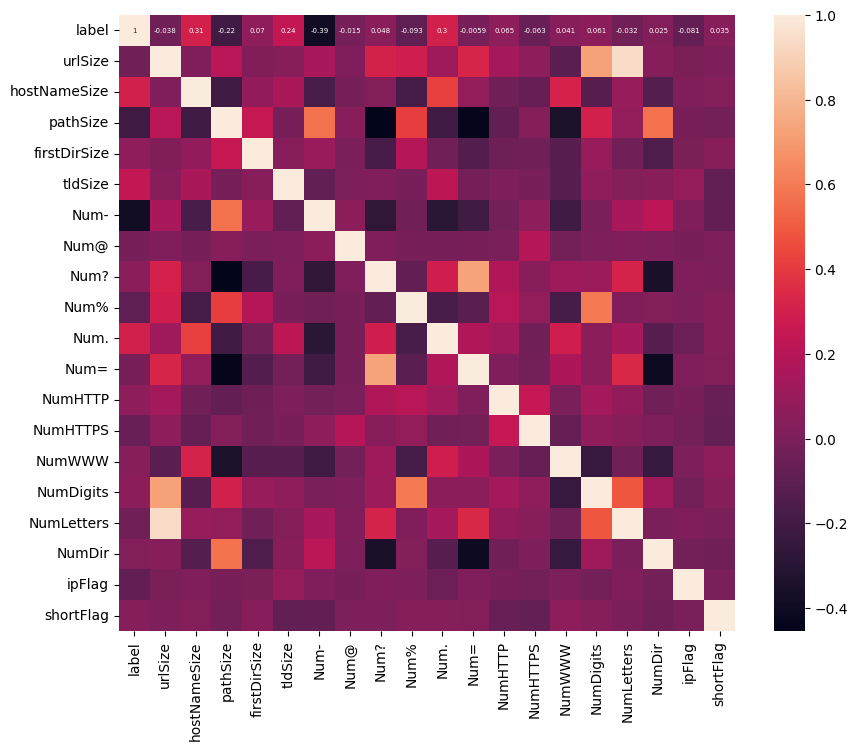

In [24]:
corrmat = data.drop(['tld','url'], axis=1).corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':5})

Text(0, 0.5, 'Total URLs')

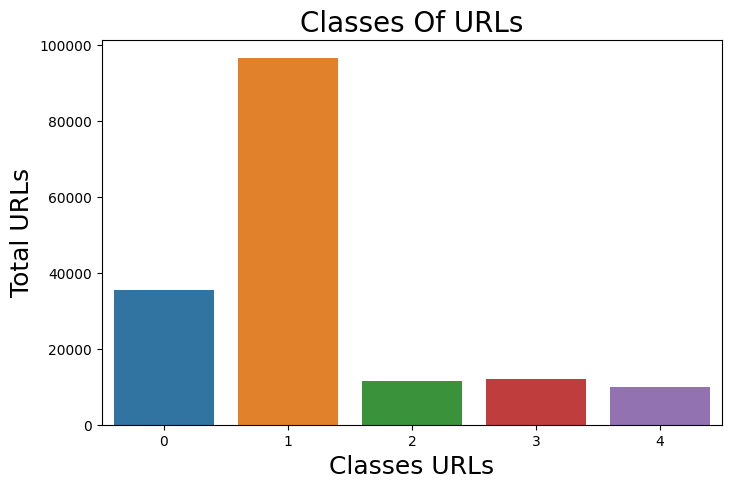

In [25]:
#Class Balance
plt.figure(figsize=(8,5))
sns.countplot(x='label',data=data)
plt.title("Classes Of URLs",fontsize=20)
plt.xlabel("Classes URLs",fontsize=18)
plt.ylabel("Total URLs",fontsize=18)

(0.0, 1000.0)

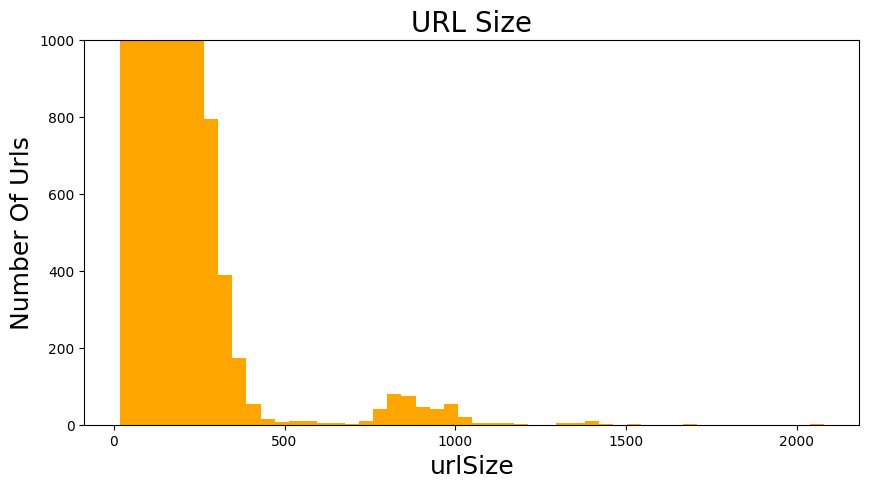

In [26]:
plt.figure(figsize=(10,5))
plt.hist(data['urlSize'],bins=50,color='orange')
plt.title("URL Size",fontsize=20)
plt.xlabel("urlSize",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

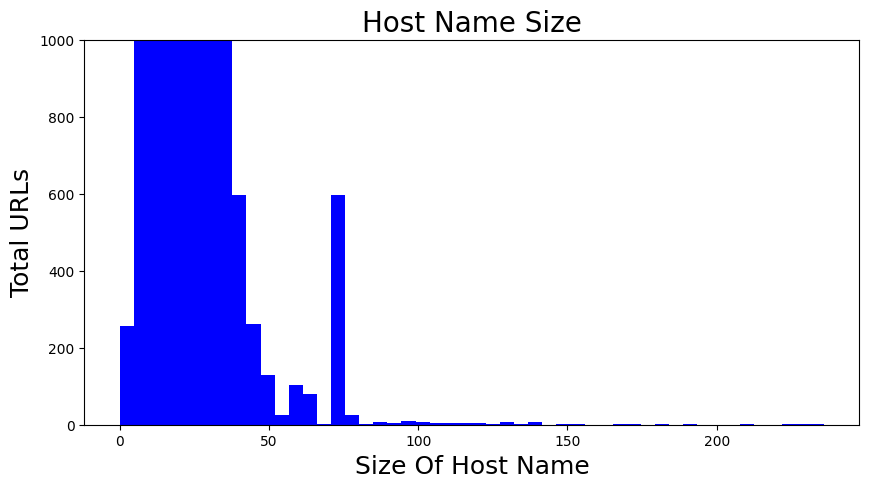

In [27]:
plt.figure(figsize=(10,5))
plt.hist(data['hostNameSize'],bins=50,color='blue')
plt.title("Host Name Size",fontsize=20)
plt.xlabel("Size Of Host Name",fontsize=18)
plt.ylabel("Total URLs",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Total URLs')

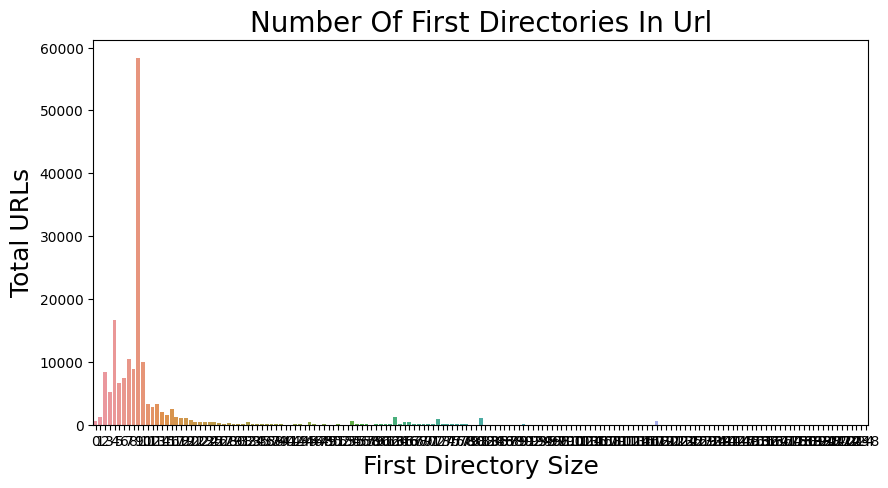

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='firstDirSize',data=data)
plt.title("Number Of First Directories In Url",fontsize=20)
plt.xlabel("First Directory Size",fontsize=18)
plt.ylabel("Total URLs",fontsize=18)

(0.0, 1000.0)

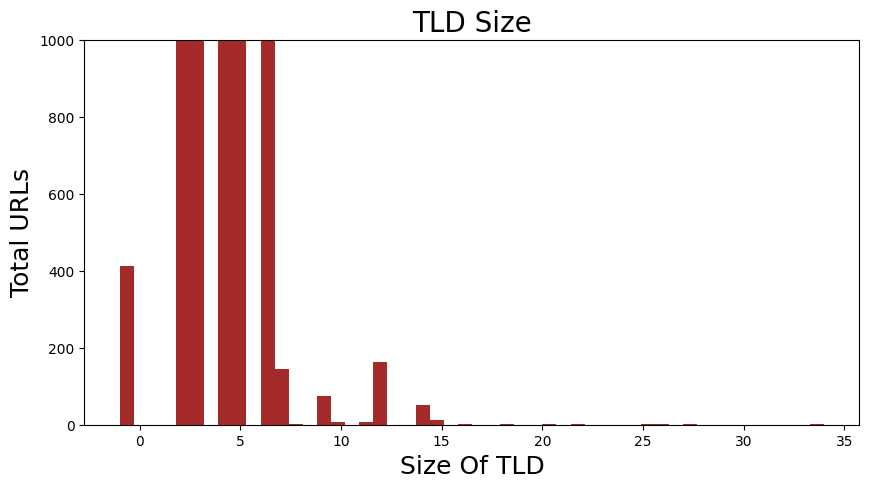

In [29]:
plt.figure(figsize=(10,5))
plt.hist(data['tldSize'],bins=50,color='Brown')
plt.title("TLD Size",fontsize=20)
plt.xlabel("Size Of TLD",fontsize=18)
plt.ylabel("Total URLs",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Total URLs')

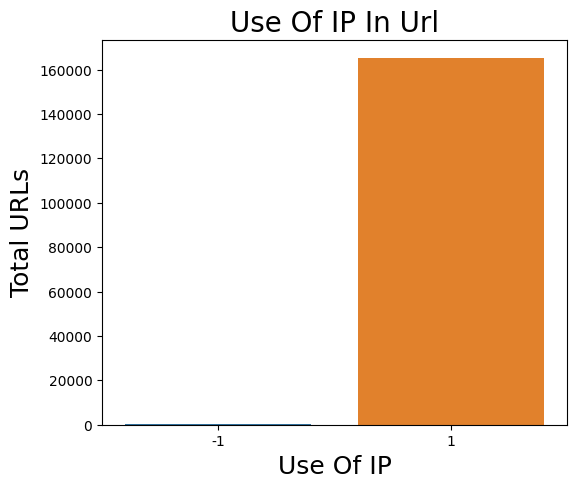

In [30]:
plt.figure(figsize=(6,5))
sns.countplot(x=data['ipFlag'])
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Total URLs",fontsize=18)

Text(0, 0.5, 'Total URLs')

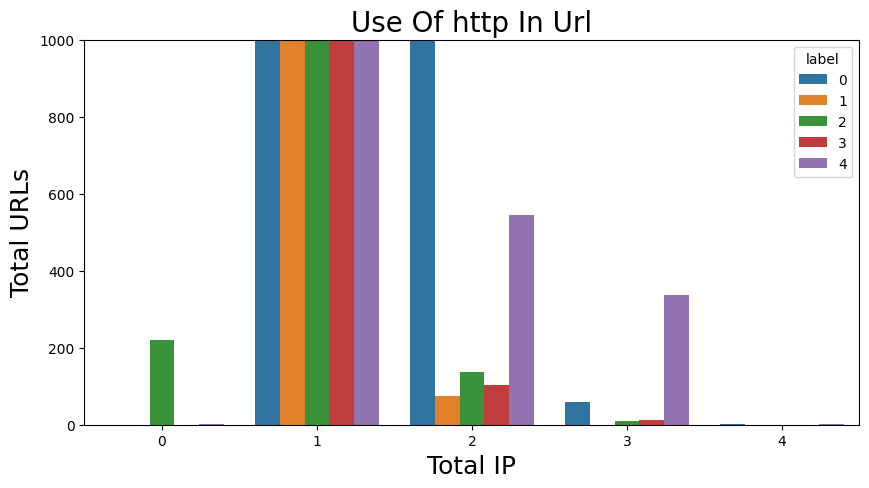

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['NumHTTP'],hue='label',data=data)
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Total IP",fontsize=18)
plt.ylim((0,1000))
plt.ylabel("Total URLs",fontsize=18)

Text(0, 0.5, 'Total URLs')

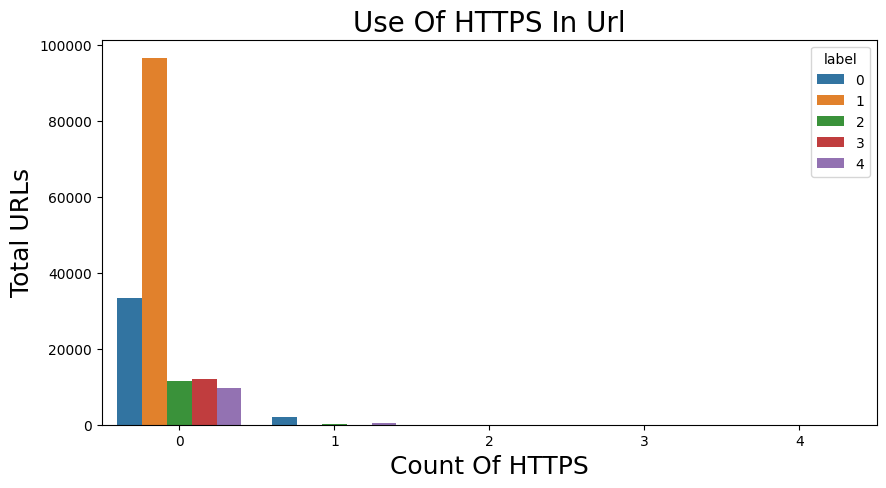

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['NumHTTPS'],hue='label',data=data)
plt.title("Use Of HTTPS In Url",fontsize=20)
plt.xlabel("Count Of HTTPS",fontsize=18)
plt.ylabel("Total URLs",fontsize=18)

Text(0, 0.5, 'Total URLs')

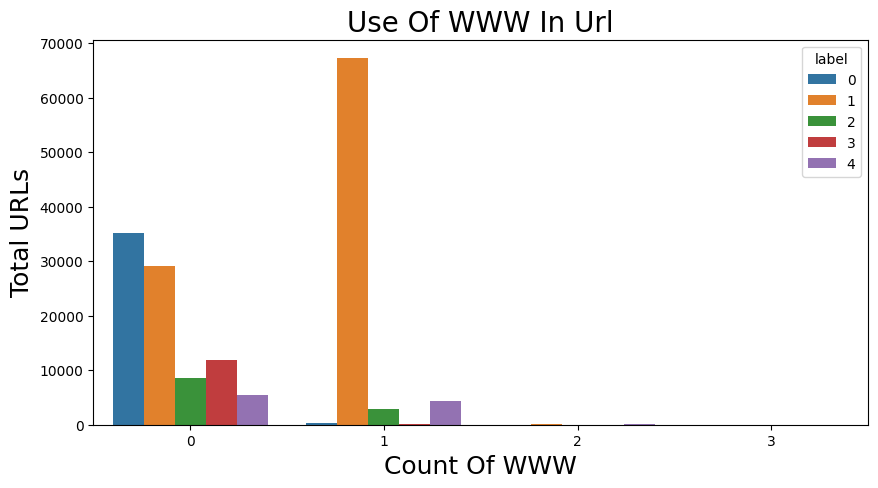

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['NumWWW'],hue='label',data=data)
plt.title("Use Of WWW In Url",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
plt.ylabel("Total URLs",fontsize=18)

#  Label Encoding

In [34]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [35]:
data['url'] = encoder.fit_transform(data['url'])
data = data.drop(['tld','url'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165366 entries, 0 to 9964
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   label         165366 non-null  int64
 1   urlSize       165366 non-null  int64
 2   hostNameSize  165366 non-null  int64
 3   pathSize      165366 non-null  int64
 4   firstDirSize  165366 non-null  int64
 5   tldSize       165366 non-null  int64
 6   Num-          165366 non-null  int64
 7   Num@          165366 non-null  int64
 8   Num?          165366 non-null  int64
 9   Num%          165366 non-null  int64
 10  Num.          165366 non-null  int64
 11  Num=          165366 non-null  int64
 12  NumHTTP       165366 non-null  int64
 13  NumHTTPS      165366 non-null  int64
 14  NumWWW        165366 non-null  int64
 15  NumDigits     165366 non-null  int64
 16  NumLetters    165366 non-null  int64
 17  NumDir        165366 non-null  int64
 18  ipFlag        165366 non-null  int64
 19  shortFlag

#  Data Preparation

In [36]:
X= data.drop('label', axis=1)
Y= data['label']

In [37]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1)

In [38]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((148829, 19), (16537, 19), (148829,), (16537,))

In [39]:
result = []

#  SVM

In [40]:
svc = SVC(kernel='linear', C=5, gamma =8, max_iter = 2)

In [41]:
svc.fit(trainX, trainY)
ypred = svc.predict(testX)

In [42]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round(), average='micro') *100
print(accuracy, f1)

8.060712342020922 8.060712342020922


In [43]:
result.append(['SVM', accuracy, f1])
result

[['SVM', 8.060712342020922, 8.060712342020922]]

#  Random Forest Trees

In [44]:
rft = RandomForestClassifier()

In [45]:
rft.fit(trainX, trainY)
ypred = rft.predict(testX)

In [46]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round(), average='micro') *100
print(accuracy, f1)

98.96595513091854 98.96595513091854


In [47]:
result.append(['Random Forest Trees', accuracy, f1])
result

[['SVM', 8.060712342020922, 8.060712342020922],
 ['Random Forest Trees', 98.96595513091854, 98.96595513091854]]

#  XGBoost

In [48]:
xgb = XGBClassifier()

In [49]:
xgb.fit(trainX, trainY)
ypred = xgb.predict(testX)

In [50]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round(), average='micro') *100
print(accuracy, f1)

98.76035556630586 98.76035556630585


In [51]:
result.append(['XGBoost', accuracy, f1])
result

[['SVM', 8.060712342020922, 8.060712342020922],
 ['Random Forest Trees', 98.96595513091854, 98.96595513091854],
 ['XGBoost', 98.76035556630586, 98.76035556630585]]

#  AdaBoost 

In [52]:
ada = AdaBoostClassifier()

In [53]:
ada.fit(trainX, trainY)
ypred = ada.predict(testX)

In [54]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round(), average='micro') *100
print(accuracy, f1)

70.59321521436777 70.59321521436777


In [55]:
result.append(['AdaBoost', accuracy, f1])
result

[['SVM', 8.060712342020922, 8.060712342020922],
 ['Random Forest Trees', 98.96595513091854, 98.96595513091854],
 ['XGBoost', 98.76035556630586, 98.76035556630585],
 ['AdaBoost', 70.59321521436777, 70.59321521436777]]

#  LightGBM

In [56]:
lr = LGBMClassifier(C=100)

In [57]:
lr.fit(trainX, trainY)
ypred = lr.predict(testX)

[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 148829, number of used features: 19
[LightGBM] [Info] Start training from score -1.540443
[LightGBM] [Info] Start training from score -0.539560
[LightGBM] [Info] Start training from score -2.658591
[LightGBM] [Info] Start training from score -2.623437
[LightGBM] [Info] Start training from score -2.811591
[LightGBM] [Warning] Unknown parameter: C


In [58]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round(), average='micro') *100
print(accuracy, f1)

98.57289713974723 98.57289713974723


In [59]:
result.append(['LightGBM', accuracy, f1])
result

[['SVM', 8.060712342020922, 8.060712342020922],
 ['Random Forest Trees', 98.96595513091854, 98.96595513091854],
 ['XGBoost', 98.76035556630586, 98.76035556630585],
 ['AdaBoost', 70.59321521436777, 70.59321521436777],
 ['LightGBM', 98.57289713974723, 98.57289713974723]]

#  Decision Trees

In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(trainX, trainY)
ypred = dt.predict(testX)

In [62]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round(), average='micro') *100
print(accuracy, f1)

98.43381508133277 98.43381508133277


In [63]:
result.append(['Decision Trees', accuracy, f1])
result

[['SVM', 8.060712342020922, 8.060712342020922],
 ['Random Forest Trees', 98.96595513091854, 98.96595513091854],
 ['XGBoost', 98.76035556630586, 98.76035556630585],
 ['AdaBoost', 70.59321521436777, 70.59321521436777],
 ['LightGBM', 98.57289713974723, 98.57289713974723],
 ['Decision Trees', 98.43381508133277, 98.43381508133277]]

#  Extra Trees Classifier

In [64]:
et = ExtraTreesClassifier()

In [65]:
et.fit(trainX, trainY)
ypred = et.predict(testX)

In [66]:
accuracy = accuracy_score(testY, ypred.round())  *100
f1 = f1_score(testY, ypred.round(), average='micro') *100
print(accuracy, f1)

98.89943762472032 98.89943762472032


In [67]:
result.append(['Extra Trees Classifier', accuracy, f1])
result

[['SVM', 8.060712342020922, 8.060712342020922],
 ['Random Forest Trees', 98.96595513091854, 98.96595513091854],
 ['XGBoost', 98.76035556630586, 98.76035556630585],
 ['AdaBoost', 70.59321521436777, 70.59321521436777],
 ['LightGBM', 98.57289713974723, 98.57289713974723],
 ['Decision Trees', 98.43381508133277, 98.43381508133277],
 ['Extra Trees Classifier', 98.89943762472032, 98.89943762472032]]

# Deep Multi Layer Perceptron

In [68]:
neural=MLPClassifier(hidden_layer_sizes=(12,12,12,12), activation='relu', solver='adam', max_iter=500)
neural.fit(trainX, trainY)

MLPClassifier(hidden_layer_sizes=(12, 12, 12, 12), max_iter=500)

In [69]:
ypred=neural.predict(testX)

In [70]:
# generating accuracy score
acc=accuracy_score(testY,ypred)*100

In [71]:
# generating f1 score
f1=f1_score(testY,ypred, average='micro')*100

In [72]:
result.append(["Deep Multi Layer Perceptron",acc,f1])

In [73]:
result

[['SVM', 8.060712342020922, 8.060712342020922],
 ['Random Forest Trees', 98.96595513091854, 98.96595513091854],
 ['XGBoost', 98.76035556630586, 98.76035556630585],
 ['AdaBoost', 70.59321521436777, 70.59321521436777],
 ['LightGBM', 98.57289713974723, 98.57289713974723],
 ['Decision Trees', 98.43381508133277, 98.43381508133277],
 ['Extra Trees Classifier', 98.89943762472032, 98.89943762472032],
 ['Deep Multi Layer Perceptron', 93.27568482796154, 93.27568482796154]]

#  Results

In [74]:
result = pd.DataFrame(result)
result.columns= ['Model', 'Accuracy','F1-Score']
result

,Model,Accuracy,F1-Score
0,SVM,8.060712,8.060712
1,Random Forest Trees,98.965955,98.965955
2,XGBoost,98.760356,98.760356
3,AdaBoost,70.593215,70.593215
4,LightGBM,98.572897,98.572897
5,Decision Trees,98.433815,98.433815
6,Extra Trees Classifier,98.899438,98.899438
7,Deep Multi Layer Perceptron,93.275685,93.275685


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SVM'),
  Text(1, 0, 'Random Forest Trees'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'AdaBoost'),
  Text(4, 0, 'LightGBM'),
  Text(5, 0, 'Decision Trees'),
  Text(6, 0, 'Extra Trees Classifier'),
  Text(7, 0, 'Deep Multi Layer Perceptron')])

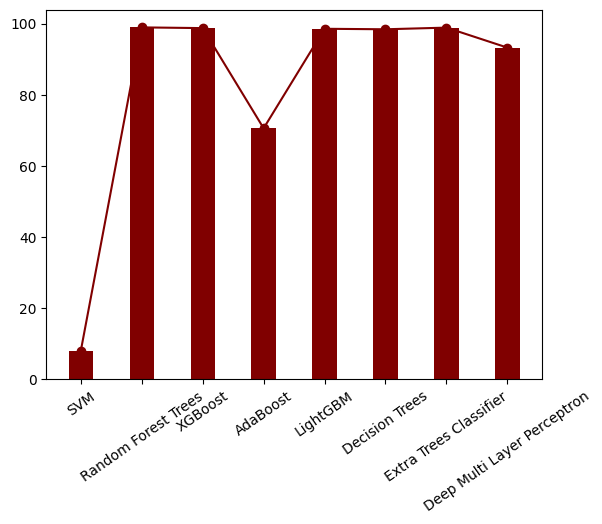

In [75]:
# creating the bar plot
plt.bar(result['Model'], result['Accuracy'], color ='maroon', width = 0.4)
plt.plot(result['Model'], result['Accuracy'], color ='maroon', marker='o')
plt.xticks(rotation=35)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SVM'),
  Text(1, 0, 'Random Forest Trees'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'AdaBoost'),
  Text(4, 0, 'LightGBM'),
  Text(5, 0, 'Decision Trees'),
  Text(6, 0, 'Extra Trees Classifier'),
  Text(7, 0, 'Deep Multi Layer Perceptron')])

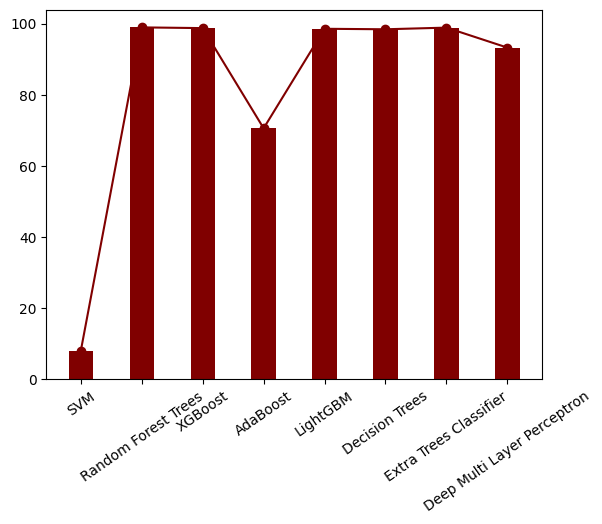

In [76]:
# creating the bar plot
plt.bar(result['Model'], result['F1-Score'], color ='maroon', width = 0.4)
plt.plot(result['Model'], result['F1-Score'], color ='maroon', marker='o')
plt.xticks(rotation=35)

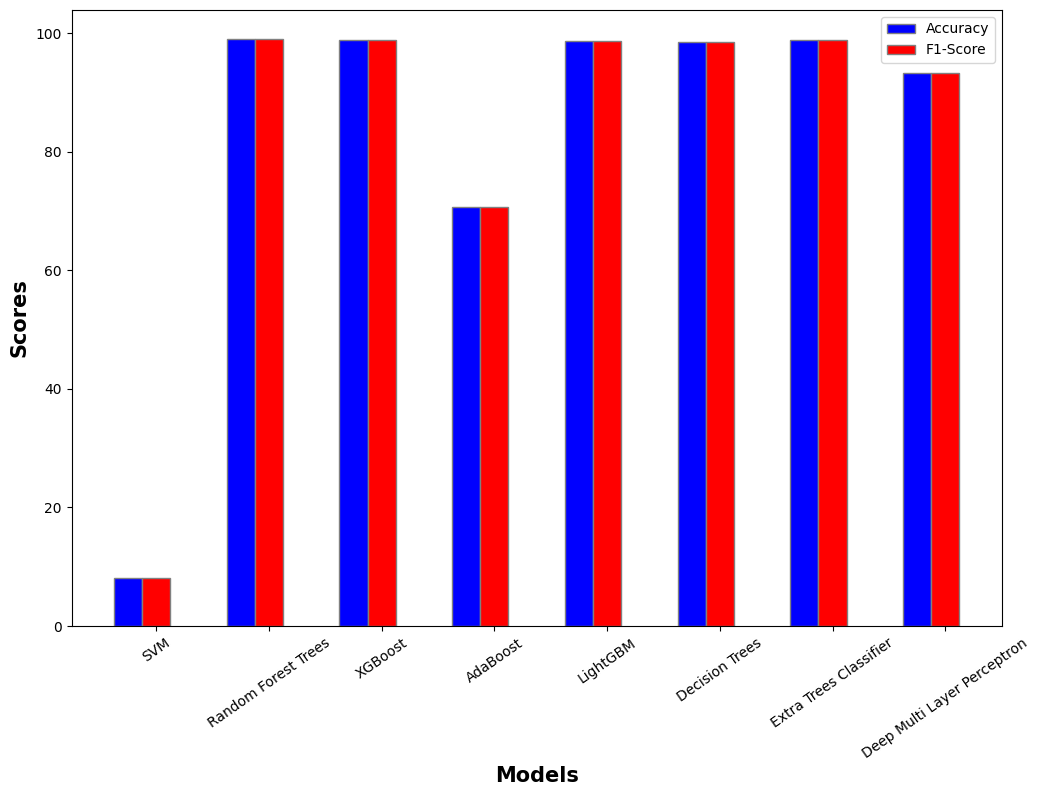

In [77]:
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(result))
br2 = [x + 0.25 for x in br1]

plt.bar(br1, result['Accuracy'], color ='b', width = 0.25, edgecolor ='grey', label ='Accuracy')
plt.bar(br2, result['F1-Score'], color ='r', width = 0.25, edgecolor ='grey', label ='F1-Score')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.25 for r in range(len(result))], result['Model'], rotation =35)
 
plt.legend()
plt.show()

In [78]:
result.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,F1-Score
1,Random Forest Trees,98.965955,98.965955
6,Extra Trees Classifier,98.899438,98.899438
2,XGBoost,98.760356,98.760356
4,LightGBM,98.572897,98.572897
5,Decision Trees,98.433815,98.433815
7,Deep Multi Layer Perceptron,93.275685,93.275685
3,AdaBoost,70.593215,70.593215
0,SVM,8.060712,8.060712


In [79]:
pickle.dump(rft, open('bestModel.pkl','wb'))